# 1.0 Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.0 Historical Data Ingestion

In [2]:
df_hist = pd.read_csv('../artifacts/dataset/hourly_historical_weather_data.csv')
df_hist

,time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
0,2000-01-01T00:00,4.0,96,3.3,1.9,0.0,0.0,1017.5,938.5,0,0,0,0,0.00,0.04,3.8,3.6,41,360,11.5
1,2000-01-01T01:00,4.1,95,3.3,1.9,0.0,0.0,1017.9,938.9,1,0,1,0,0.00,0.04,4.1,4.4,38,351,11.9
2,2000-01-01T02:00,4.0,95,3.2,1.9,0.0,0.0,1018.8,939.7,1,0,1,0,0.01,0.04,3.8,4.5,41,346,11.9
3,2000-01-01T03:00,6.5,92,5.3,4.7,0.0,0.0,1019.4,940.9,3,0,3,0,0.02,0.07,4.3,4.0,42,355,13.0
4,2000-01-01T04:00,12.9,75,8.6,12.2,0.0,0.0,1020.0,943.1,0,0,0,0,0.13,0.37,2.0,2.5,45,8,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219163,2024-12-31T19:00,8.4,97,7.9,7.6,0.0,0.0,1019.8,941.8,100,100,5,6,0.00,0.03,1.5,3.1,291,360,4.0
219164,2024-12-31T20:00,8.4,96,7.8,7.4,0.0,0.0,1019.1,941.1,97,95,34,21,0.00,0.04,2.7,5.0,328,360,6.5
219165,2024-12-31T21:00,8.4,91,7.1,7.2,0.0,0.0,1018.4,940.5,84,57,54,19,0.00,0.10,3.3,6.2,319,338,7.2
219166,2024-12-31T22:00,8.9,80,5.7,7.3,0.0,0.0,1017.7,940.0,78,43,7,58,0.00,0.23,3.9,7.5,338,345,9.7


# 2.1 Date Time Conversion

In [3]:
df_hist['time'] = pd.to_datetime(df_hist['time'])
df_hist['hour'] = df_hist['time'].dt.hour
df_hist['day'] = df_hist['time'].dt.day
df_hist['month'] = df_hist['time'].dt.month
df_hist['year'] = df_hist['time'].dt.year

# 3.0 Data Visualization

In [4]:
df_hist = df_hist.drop(['cloud_cover', 'cloud_cover_high', 'wind_direction_10m', 'wind_direction_100m'], axis='columns')

## 3.1 Line Plot

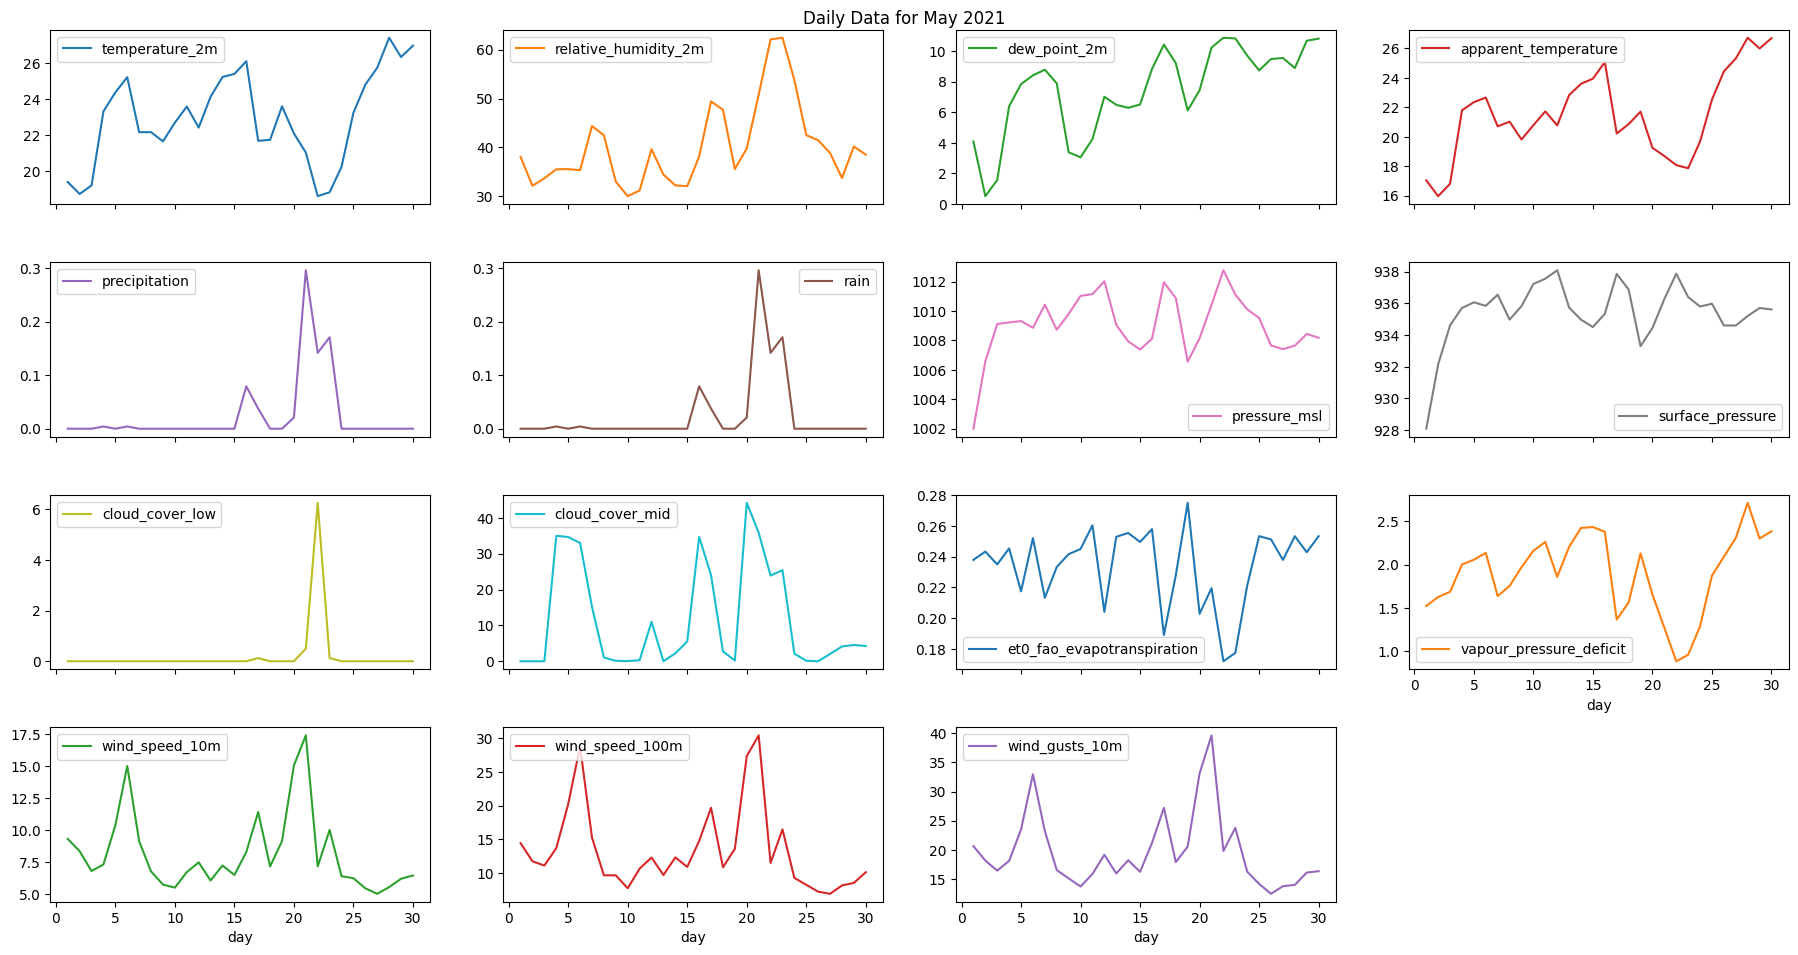

In [5]:
columns_to_plot = [
    'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain', 
    'pressure_msl', 'surface_pressure', 'cloud_cover_low', 'cloud_cover_mid', 'et0_fao_evapotranspiration', 
    'vapour_pressure_deficit', 'wind_speed_10m', 'wind_speed_100m', 'wind_gusts_10m']

year = 2021
df_hist01 = df_hist[df_hist['year'] == year]

df_may = df_hist01[df_hist01['month'] == 4]
daily_data = df_may.groupby(df_may['day']).mean()

daily_data[columns_to_plot].plot(figsize=(18, 14), subplots=True, layout=(6, 4), title=f'Daily Data for May {year}')
plt.tight_layout()
plt.show()

## 3.2 Time Series Plot

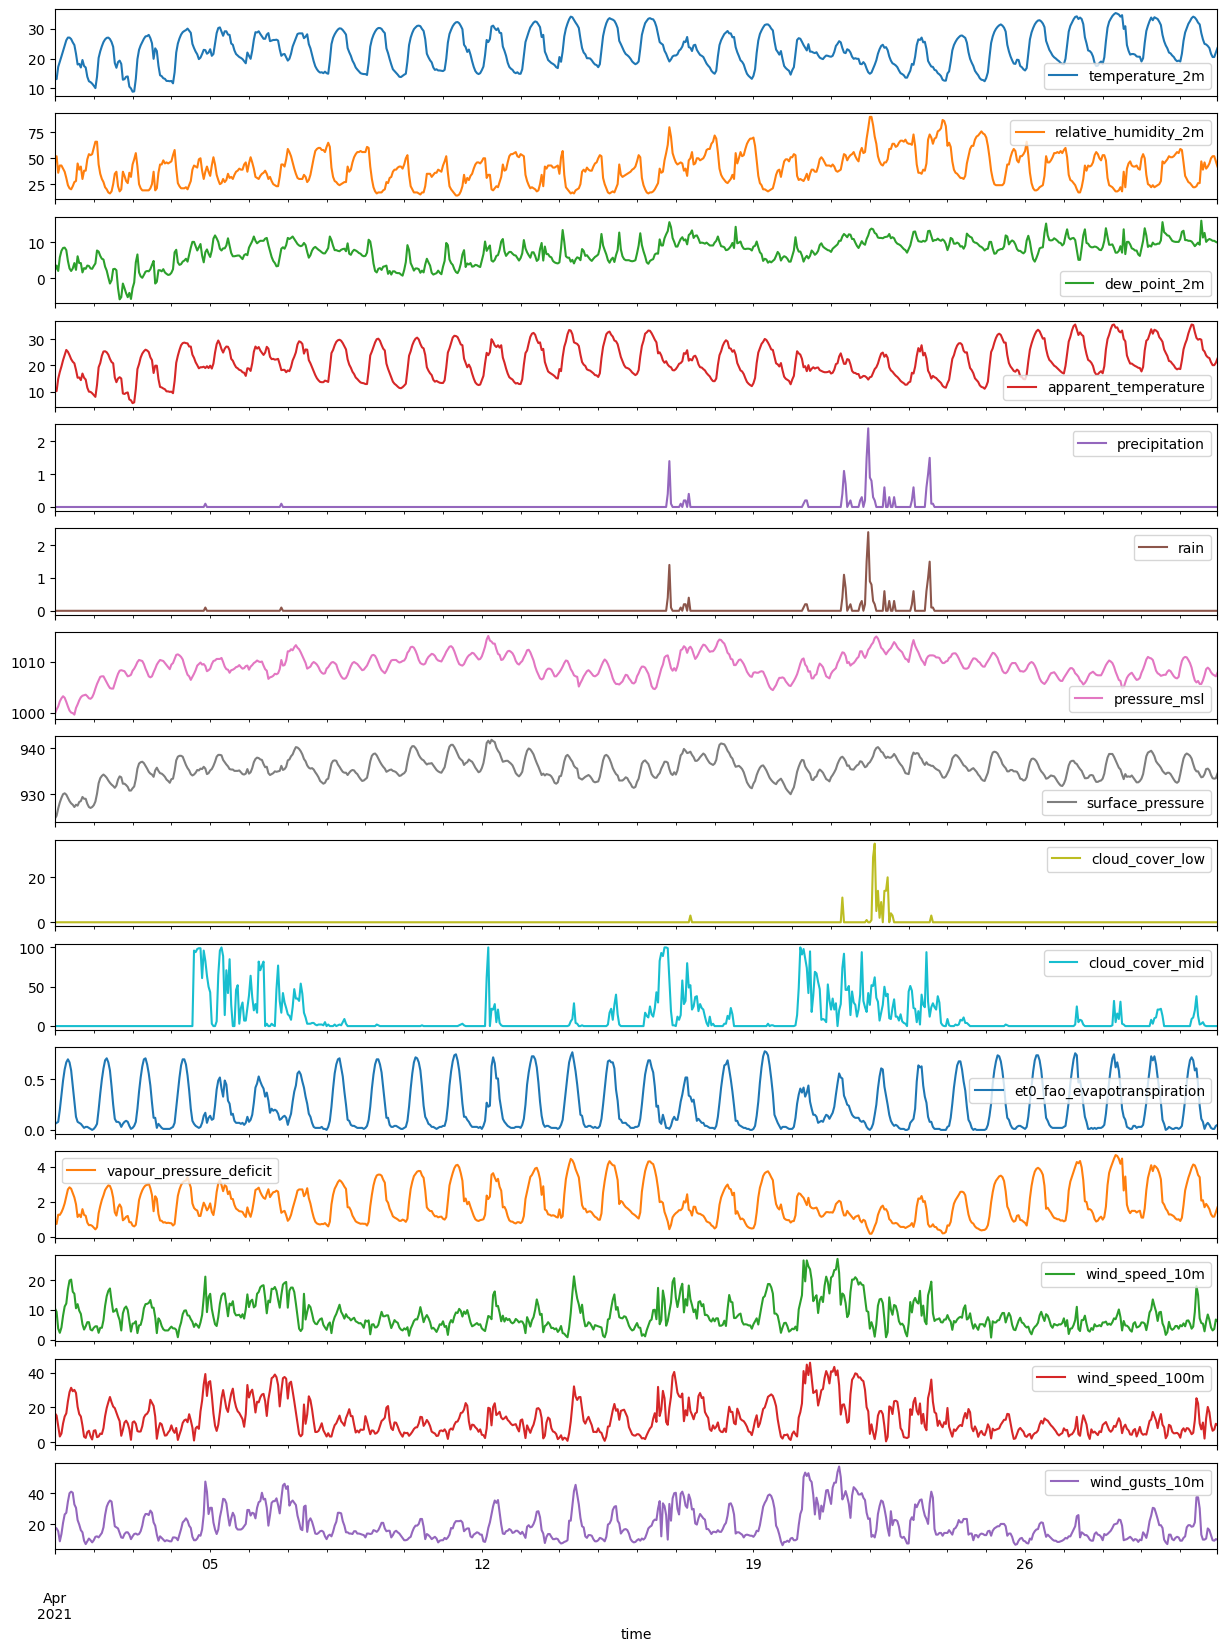

In [6]:
df_may.set_index('time')[df_may.select_dtypes(include=['float64', 'int64']).columns].plot(subplots=True, figsize=(15, 20))
plt.show()

## 3.3 Histogram & Boxplots

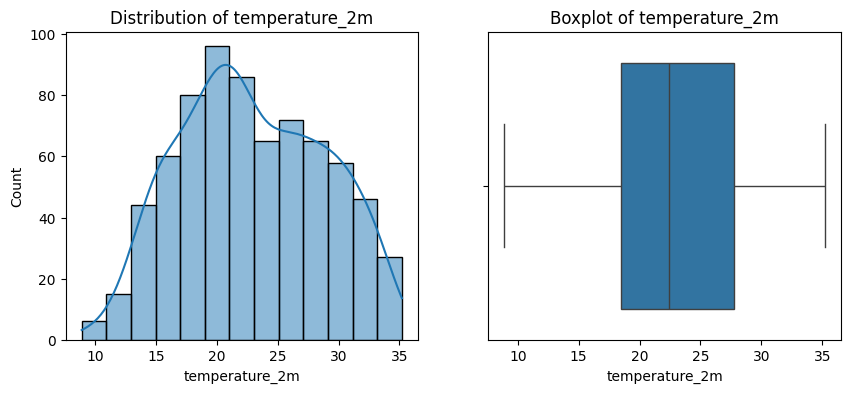

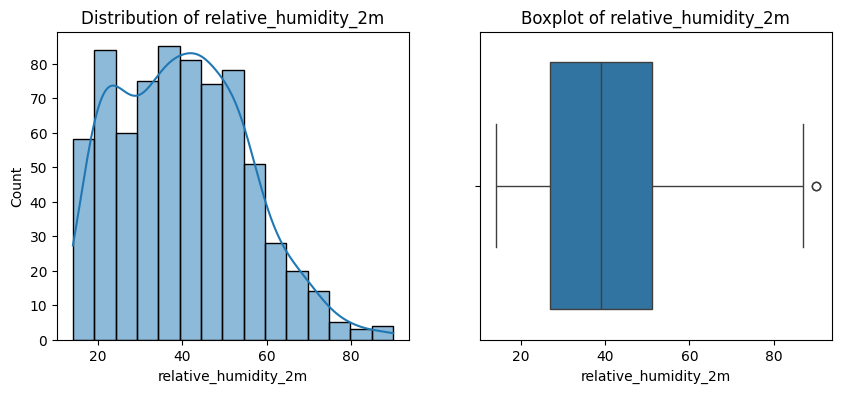

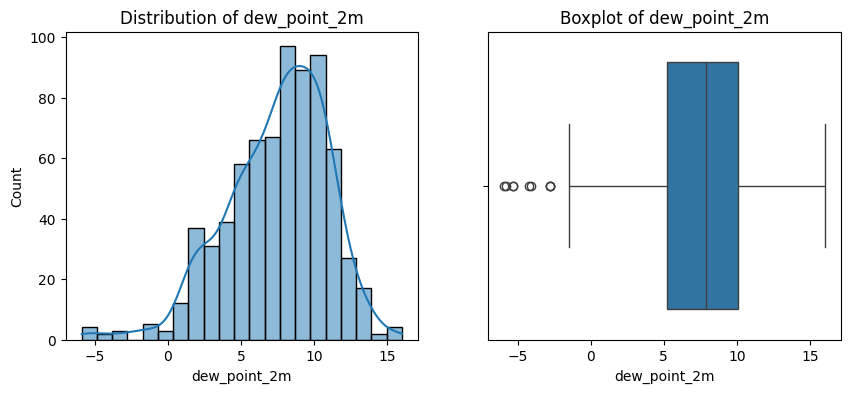

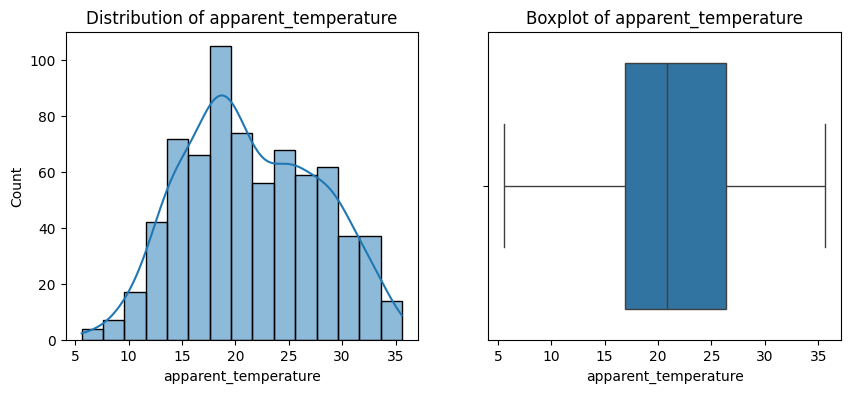

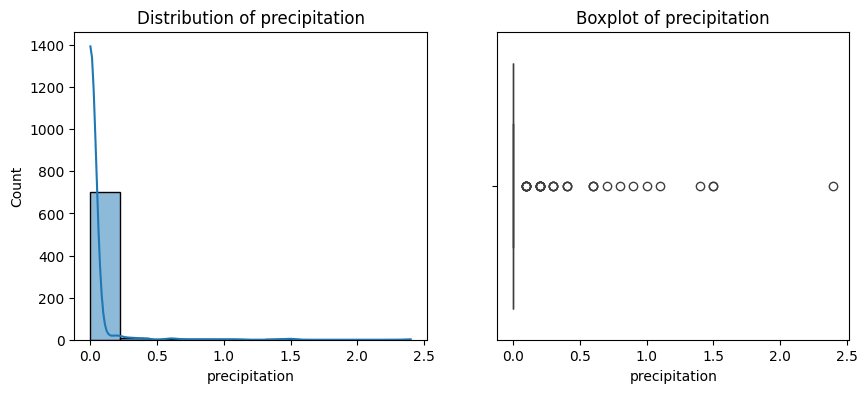

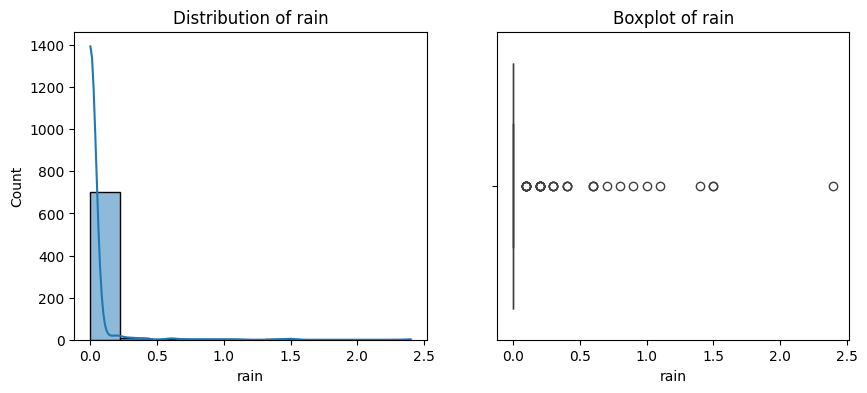

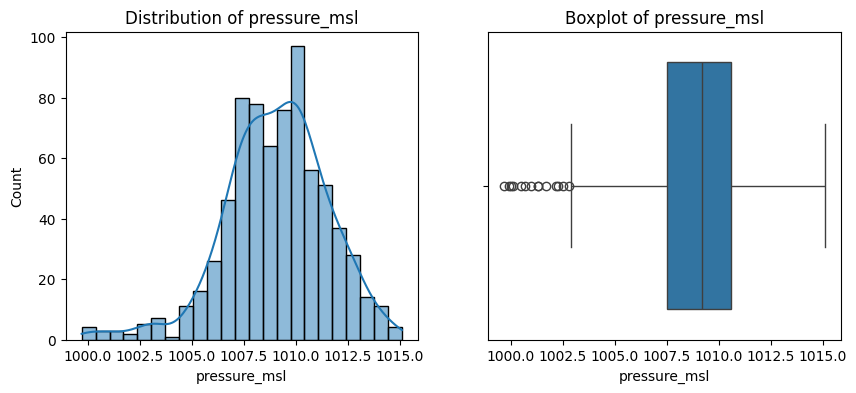

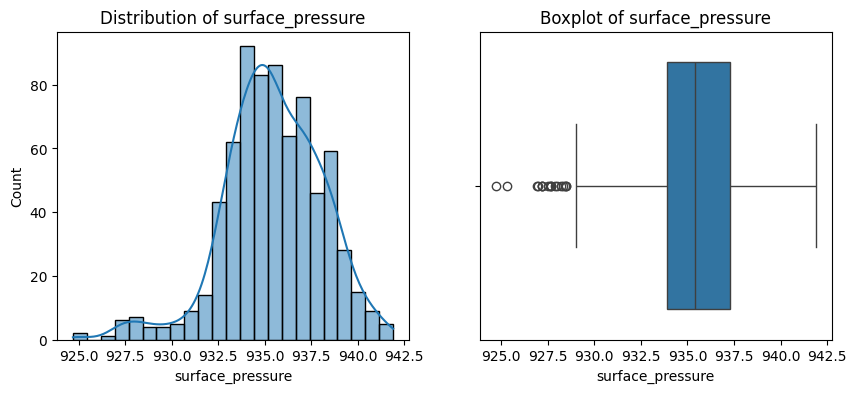

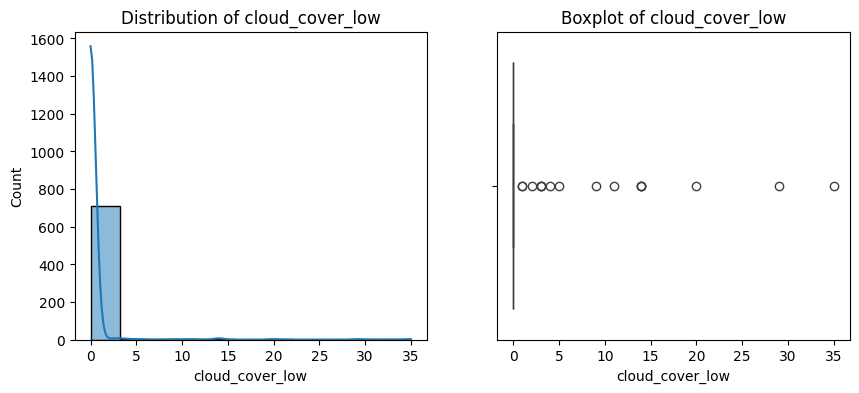

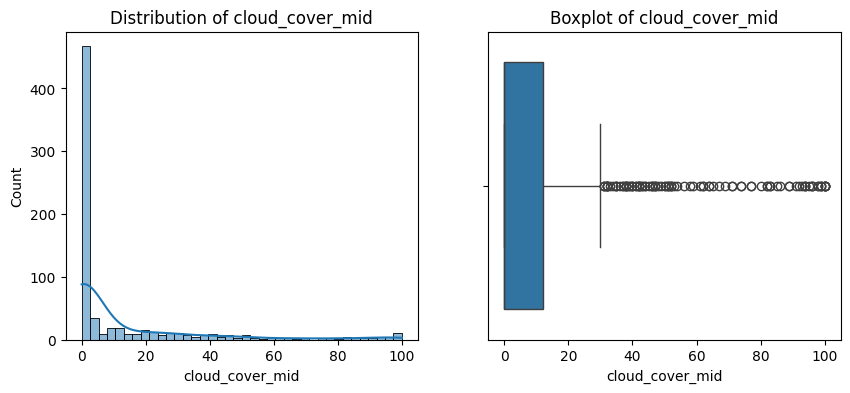

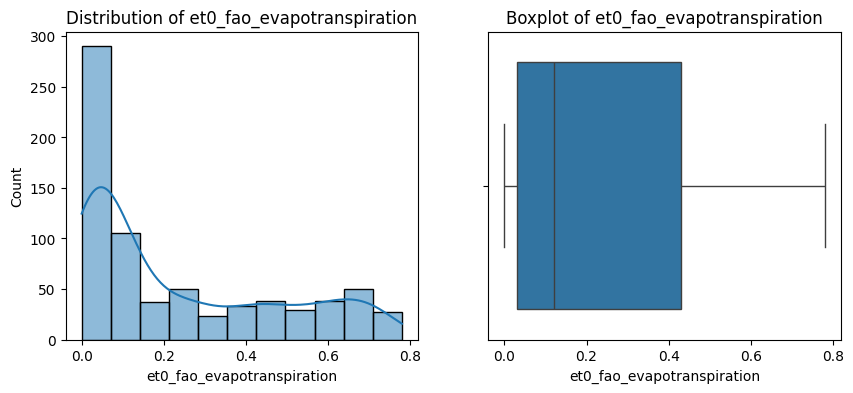

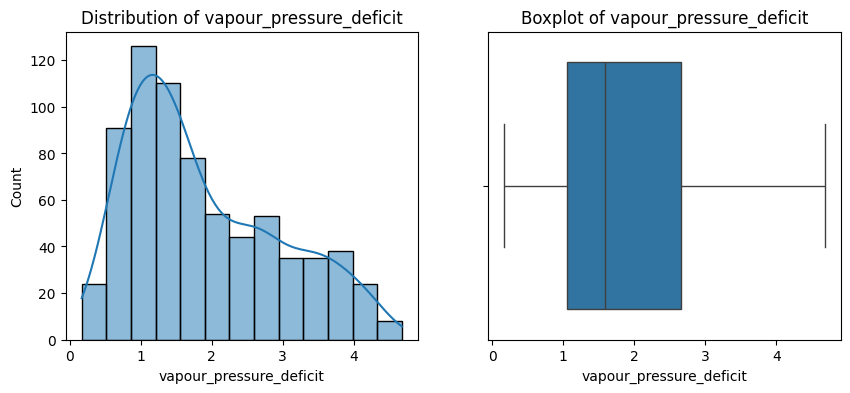

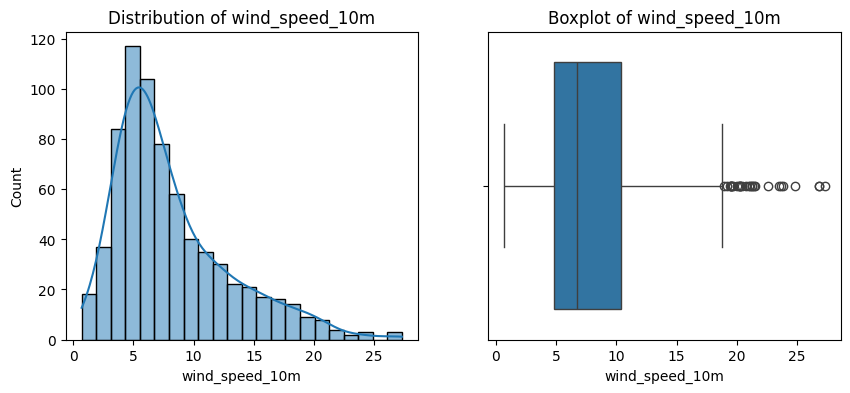

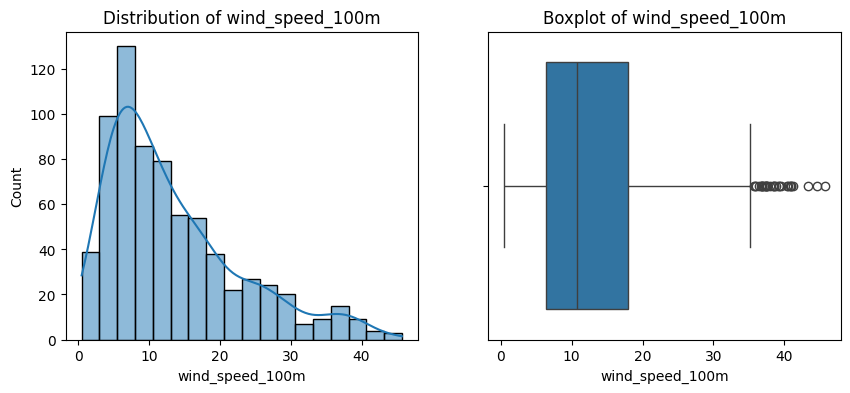

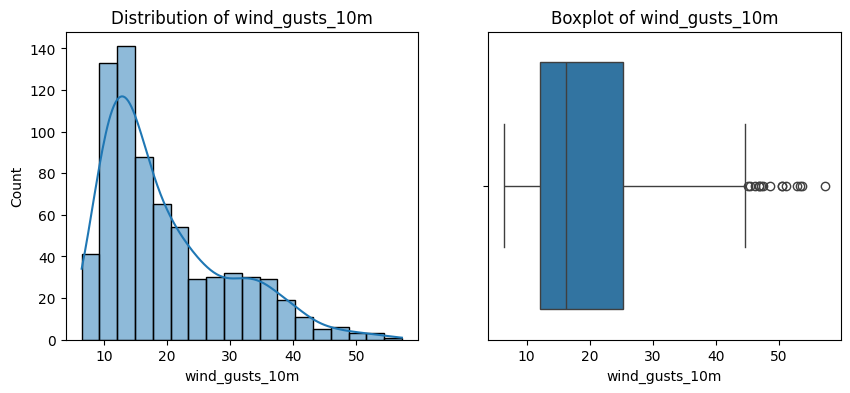

In [7]:
for column in df_may.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df_may[column], kde=True)
    plt.title(f'Distribution of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_may[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

## 3.4 Correlation Heatmap

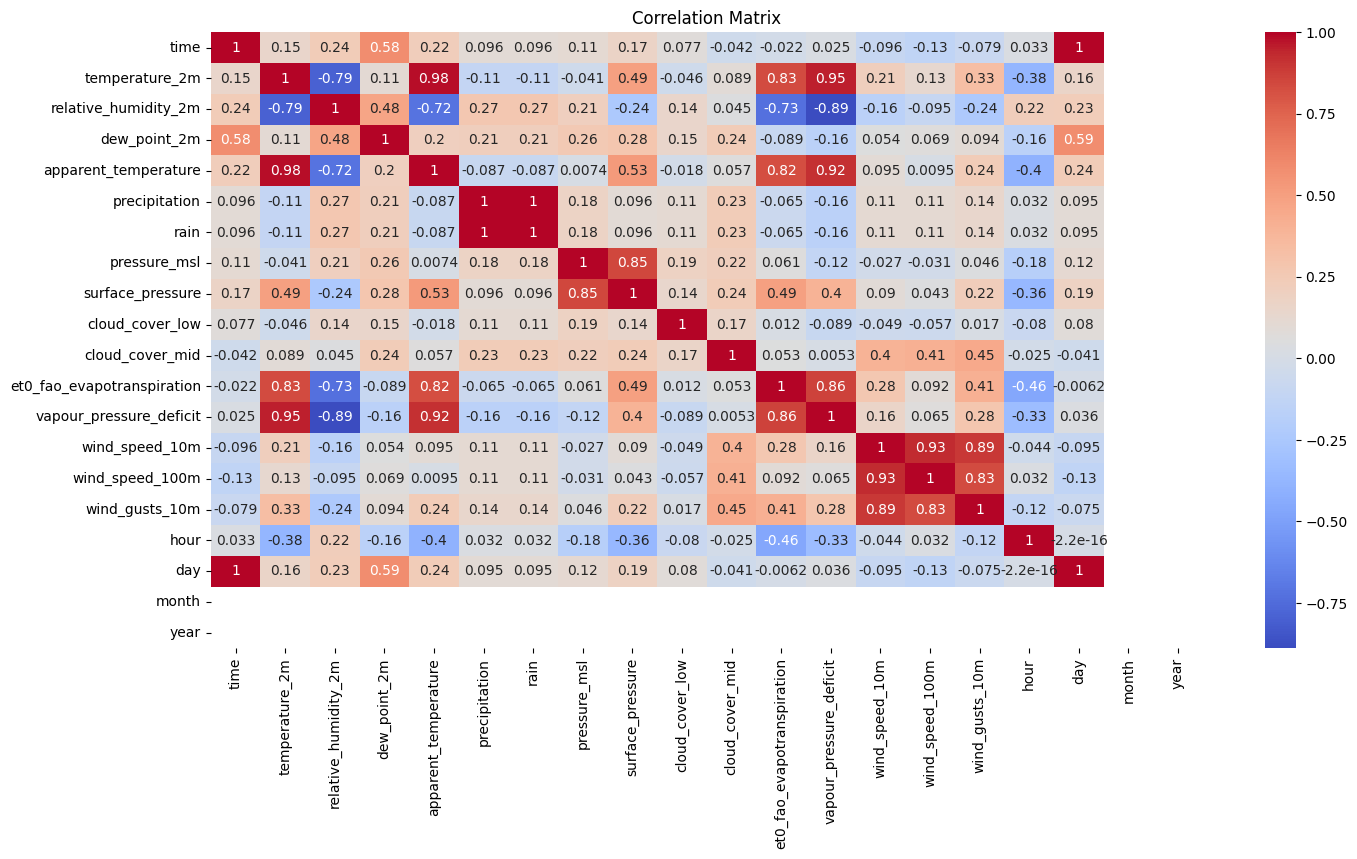

In [8]:
plt.figure(figsize=(16, 8))
sns.heatmap(df_may.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4.0 Data Pre-processing

In [9]:
df_may.describe()

,time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover_low,cloud_cover_mid,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_gusts_10m,hour,day,month,year
count,720,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.0,720.0
mean,2021-04-15 23:30:00,22.940139,40.145833,7.469861,21.504028,0.025139,0.025139,1009.054028,935.447917,0.233333,11.547222,0.234083,1.896542,8.158333,13.395833,19.680278,11.500000,15.500000,4.0,2021.0
min,2021-04-01 00:00:00,8.900000,14.000000,-5.900000,5.600000,0.000000,0.000000,999.700000,924.700000,0.000000,0.000000,0.000000,0.170000,0.700000,0.500000,6.500000,0.000000,1.000000,4.0,2021.0
25%,2021-04-08 11:45:00,18.475000,27.000000,5.200000,16.900000,0.000000,0.000000,1007.500000,933.900000,0.000000,0.000000,0.030000,1.050000,4.800000,6.375000,12.200000,5.750000,8.000000,4.0,2021.0
50%,2021-04-15 23:30:00,22.400000,39.000000,7.900000,20.800000,0.000000,0.000000,1009.200000,935.400000,0.000000,0.000000,0.120000,1.580000,6.750000,10.700000,16.200000,11.500000,15.500000,4.0,2021.0
75%,2021-04-23 11:15:00,27.750000,51.000000,10.100000,26.325000,0.000000,0.000000,1010.600000,937.300000,0.000000,12.000000,0.430000,2.662500,10.425000,18.000000,25.300000,17.250000,23.000000,4.0,2021.0
max,2021-04-30 23:00:00,35.200000,90.000000,16.000000,35.600000,2.400000,2.400000,1015.100000,941.900000,35.000000,100.000000,0.780000,4.680000,27.300000,45.700000,57.200000,23.000000,30.000000,4.0,2021.0
std,NaN,5.866257,15.236553,3.458604,6.275499,0.159428,0.159428,2.472010,2.635306,2.139372,22.672071,0.239839,1.064601,4.818169,9.400841,9.917943,6.926999,8.661458,0.0,0.0


In [10]:
df_may['rain'].unique()

array([0. , 0.1, 0.4, 1.4, 0.2, 1.1, 0.7, 0.3, 1.5, 2.4, 0.9, 0.8, 0.6,
       1. ])

## 4.1 Manual Binning of some features

In [137]:
# df_may_2021 = df_may.copy()

# def process_feature_column(df, column_name, bins, labels, drop_original=True):
#     # Step 1: Apply custom ranges and convert to categorical
#     df[f'{column_name}_category'] = pd.cut(df[column_name], bins=bins, labels=labels, right=False)
#     df[f'{column_name}_category'] = df[f'{column_name}_category'].astype('category')
    
#     # Step 2: Generate dummy variables
#     df_updated = pd.get_dummies(data=df, columns=[f'{column_name}_category'], prefix=column_name)
    
#     # Step 3 & 4: Convert boolean columns to integers
#     for column in df_updated:
#         if df_updated[column].dtypes == 'bool':
#             df_updated[column] = df_updated[column].astype(int)
    
#     # Step 5: Drop original column if specified
#     if drop_original:
#         df_updated = df_updated.drop(columns=[column_name])
    
#     return df_updated

In [138]:
# bins_temp = [0, 15, 25, 30, 40]  # ranges
# bins_humidity = [10, 25, 35, 45, 65, 95]
# bins_dew = [-10, 0, 5, 10, 20,]

# labels_temp = ['Very-Low', 'Low', 'Moderate', 'High']  # labels for each range
# labels_humidity = ['Very-Low', 'Low', 'Moderate', 'High', 'Very-High']
# labels_dew = ['Very-Low', 'Low', 'Moderate', 'High']

# df_may_2021 = process_feature_column(df_may_2021, 'temperature_2m', bins_temp, labels_temp)
# df_may_2021 = process_feature_column(df_may_2021, 'relative_humidity_2m', bins_humidity, labels_humidity)
# df_may_2021 = process_feature_column(df_may_2021, 'dew_point_2m', bins_dew, labels_dew)
# df_may_2021

## 4.1 Binning of features using K means Clustering

In [11]:
df_may.columns

Index(['time', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation', 'rain', 'pressure_msl',
       'surface_pressure', 'cloud_cover_low', 'cloud_cover_mid',
       'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
       'wind_speed_10m', 'wind_speed_100m', 'wind_gusts_10m', 'hour', 'day',
       'month', 'year'],
      dtype='object')

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def bin_using_kmeans(df, columns, n_bins):
    df_result = df.copy()
    
    # Loop over each column in the list
    for column_name in columns:
        # Standardize the feature
        scaler = StandardScaler()
        column_scaled = scaler.fit_transform(df_result[[column_name]])

        # Apply K-Means with n_bins clusters
        kmeans = KMeans(n_clusters=n_bins, random_state=42)

        # Assign clusters and convert to categorical type
        df_result.loc[:, f'{column_name}_cluster'] = kmeans.fit_predict(column_scaled)
        df_result.loc[:, f'{column_name}_cluster'] = df_result[f'{column_name}_cluster'].astype('category')

        # Generate dummy variables if needed
        df_result = pd.get_dummies(data=df_result, columns=[f'{column_name}_cluster'], prefix=column_name)

        # Drop the original column
        df_result.drop(columns=[column_name], inplace=True)
    
    return df_result

In [13]:
binning_columns = [
    'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'cloud_cover_low', 'cloud_cover_mid',
    'et0_fao_evapotranspiration', 'vapour_pressure_deficit', 'wind_speed_10m', 'wind_speed_100m', 'wind_gusts_10m'
]

df_may_2021 = bin_using_kmeans(df_may, binning_columns, n_bins=6)
df_may_2021

,time,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,hour,day,month,year,...,wind_speed_100m_2,wind_speed_100m_3,wind_speed_100m_4,wind_speed_100m_5,wind_gusts_10m_0,wind_gusts_10m_1,wind_gusts_10m_2,wind_gusts_10m_3,wind_gusts_10m_4,wind_gusts_10m_5
186264,2021-04-01 00:00:00,10.3,0.0,0.0,999.9,924.7,0,1,4,2021,...,False,False,False,False,True,False,False,False,False,False
186265,2021-04-01 01:00:00,10.2,0.0,0.0,1000.7,925.3,1,1,4,2021,...,False,False,False,False,False,False,True,False,False,False
186266,2021-04-01 02:00:00,14.9,0.0,0.0,1001.3,926.9,2,1,4,2021,...,False,False,True,False,False,False,True,False,False,False
186267,2021-04-01 03:00:00,17.5,0.0,0.0,1002.3,928.2,3,1,4,2021,...,False,False,False,False,False,False,False,False,True,False
186268,2021-04-01 04:00:00,19.6,0.0,0.0,1002.9,929.2,4,1,4,2021,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186979,2021-04-30 19:00:00,21.2,0.0,0.0,1008.0,934.2,19,30,4,2021,...,False,True,False,False,False,False,True,False,False,False
186980,2021-04-30 20:00:00,20.1,0.0,0.0,1007.6,933.5,20,30,4,2021,...,False,False,True,False,False,False,False,False,True,False
186981,2021-04-30 21:00:00,20.1,0.0,0.0,1007.4,933.4,21,30,4,2021,...,False,False,True,False,False,False,False,False,True,False
186982,2021-04-30 22:00:00,21.0,0.0,0.0,1007.2,933.5,22,30,4,2021,...,False,True,False,False,False,False,False,False,True,False


In [14]:
df_may_2021 = df_may_2021.astype({col: 'int' for col in df_may_2021.select_dtypes('bool').columns})

df_may_2021.dtypes

time                    datetime64[ns]
apparent_temperature           float64
precipitation                  float64
rain                           float64
pressure_msl                   float64
                             ...      
wind_gusts_10m_1                 int64
wind_gusts_10m_2                 int64
wind_gusts_10m_3                 int64
wind_gusts_10m_4                 int64
wind_gusts_10m_5                 int64
Length: 70, dtype: object

## 4.2 Manual Binning of dependent Variable into a new column 

1. **No Rain**: Rainfall > 0 mm/hr
2. **Trace Rainfall**: Rainfall > 0.0004 to 0.002 mm/hr
3. **Very Light Rainfall**: Rainfall > 0.004 to 0.1 mm/hr
4. **Light Rainfall**: Rainfall > 0.3 mm/hr
5. **Moderate Rainfall**: Rainfall > 1.5 mm/hr
6. **Heavy Rainfall**: Rainfall > *6.5 cm/day* = 0.27 cm/hr = 2.7 mm/hr
7. **Very Heavy Rainfall**: Rainfall > *13.0 cm/day* = 0.55 cm/hr = 5.5 mm/hr
8. **Extremely Heavy Rainfall**: Rainfall > *20.0 cm/day* = 0.85 cm/hr = 8.5 mm/hr
9. **Mini-Cloud Burst (MCB)**: Rainfall exceeds *5 cm over any two consecutive hours* = 2.5 cm/hr = 25 mm/hr
10. **Cloudburst (CB)**: Rainfall > *10 cm in a single hour* = 10 cm/hr = 100 mm/hr

In [15]:
def categorize_rain_intensity(df, column_name, bins, labels, new_column_name):
    # Step 1: Bin the rain column based on custom ranges
    df[new_column_name] = pd.cut(df[column_name], bins=bins, labels=labels, right=False)
    
    # Step 2: Map each label to a unique integer
    label_to_int = {label: i for i, label in enumerate(labels)}
    df[new_column_name] = df[new_column_name].map(label_to_int)
    
    # Convert to categorical type if desired
    df[new_column_name] = df[new_column_name].astype(int)
    
    return df

bins_rain = [0, 0.002, 0.1, 0.3, 1.5, 2.7, 5.5, 8.5, 25, 100]
labels_rain = ['no', 'trace', 'very_light', 'light', 'moderate', 'heavy', 'very_heavy', 'extremely_heavy', 'mini-CB']

df_may_2021 = categorize_rain_intensity(df_may_2021, 'rain', bins_rain, labels_rain, 'rain_intensity')

In [16]:
df_may_2021.rain_intensity.unique()

array([0, 2, 3, 4])

In [17]:
df_may_2021.describe()

,time,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,hour,day,month,year,...,wind_speed_100m_3,wind_speed_100m_4,wind_speed_100m_5,wind_gusts_10m_0,wind_gusts_10m_1,wind_gusts_10m_2,wind_gusts_10m_3,wind_gusts_10m_4,wind_gusts_10m_5,rain_intensity
count,720,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.0,720.0,...,720.000000,720.000000,720.00000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,2021-04-15 23:30:00,21.504028,0.025139,0.025139,1009.054028,935.447917,11.500000,15.500000,4.0,2021.0,...,0.213889,0.251389,0.06250,0.177778,0.115278,0.298611,0.040278,0.261111,0.106944,0.130556
min,2021-04-01 00:00:00,5.600000,0.000000,0.000000,999.700000,924.700000,0.000000,1.000000,4.0,2021.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-04-08 11:45:00,16.900000,0.000000,0.000000,1007.500000,933.900000,5.750000,8.000000,4.0,2021.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021-04-15 23:30:00,20.800000,0.000000,0.000000,1009.200000,935.400000,11.500000,15.500000,4.0,2021.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2021-04-23 11:15:00,26.325000,0.000000,0.000000,1010.600000,937.300000,17.250000,23.000000,4.0,2021.0,...,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2021-04-30 23:00:00,35.600000,2.400000,2.400000,1015.100000,941.900000,23.000000,30.000000,4.0,2021.0,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000
std,NaN,6.275499,0.159428,0.159428,2.472010,2.635306,6.926999,8.661458,0.0,0.0,...,0.410334,0.434113,0.24223,0.382591,0.319579,0.457967,0.196747,0.439546,0.309257,0.586979


In [18]:
df_may_2021 = df_may_2021.drop(columns=['apparent_temperature', 'precipitation', 'rain', 'pressure_msl', 'surface_pressure'])

In [19]:
df_may_2021.columns

Index(['time', 'hour', 'day', 'month', 'year', 'temperature_2m_0',
       'temperature_2m_1', 'temperature_2m_2', 'temperature_2m_3',
       'temperature_2m_4', 'temperature_2m_5', 'relative_humidity_2m_0',
       'relative_humidity_2m_1', 'relative_humidity_2m_2',
       'relative_humidity_2m_3', 'relative_humidity_2m_4',
       'relative_humidity_2m_5', 'dew_point_2m_0', 'dew_point_2m_1',
       'dew_point_2m_2', 'dew_point_2m_3', 'dew_point_2m_4', 'dew_point_2m_5',
       'cloud_cover_low_0', 'cloud_cover_low_1', 'cloud_cover_low_2',
       'cloud_cover_low_3', 'cloud_cover_low_4', 'cloud_cover_low_5',
       'cloud_cover_mid_0', 'cloud_cover_mid_1', 'cloud_cover_mid_2',
       'cloud_cover_mid_3', 'cloud_cover_mid_4', 'cloud_cover_mid_5',
       'et0_fao_evapotranspiration_0', 'et0_fao_evapotranspiration_1',
       'et0_fao_evapotranspiration_2', 'et0_fao_evapotranspiration_3',
       'et0_fao_evapotranspiration_4', 'et0_fao_evapotranspiration_5',
       'vapour_pressure_deficit_0'

## 4.3 Min Max Scaling

In [20]:
from sklearn.model_selection import train_test_split

X = df_may_2021.drop(columns=['time', 'hour', 'day', 'month', 'year', 'rain_intensity'])
y = df_may_2021['rain_intensity']

X.columns

Index(['temperature_2m_0', 'temperature_2m_1', 'temperature_2m_2',
       'temperature_2m_3', 'temperature_2m_4', 'temperature_2m_5',
       'relative_humidity_2m_0', 'relative_humidity_2m_1',
       'relative_humidity_2m_2', 'relative_humidity_2m_3',
       'relative_humidity_2m_4', 'relative_humidity_2m_5', 'dew_point_2m_0',
       'dew_point_2m_1', 'dew_point_2m_2', 'dew_point_2m_3', 'dew_point_2m_4',
       'dew_point_2m_5', 'cloud_cover_low_0', 'cloud_cover_low_1',
       'cloud_cover_low_2', 'cloud_cover_low_3', 'cloud_cover_low_4',
       'cloud_cover_low_5', 'cloud_cover_mid_0', 'cloud_cover_mid_1',
       'cloud_cover_mid_2', 'cloud_cover_mid_3', 'cloud_cover_mid_4',
       'cloud_cover_mid_5', 'et0_fao_evapotranspiration_0',
       'et0_fao_evapotranspiration_1', 'et0_fao_evapotranspiration_2',
       'et0_fao_evapotranspiration_3', 'et0_fao_evapotranspiration_4',
       'et0_fao_evapotranspiration_5', 'vapour_pressure_deficit_0',
       'vapour_pressure_deficit_1', 'vapour_p

In [21]:
X.dtypes

temperature_2m_0                int64
temperature_2m_1                int64
temperature_2m_2                int64
temperature_2m_3                int64
temperature_2m_4                int64
temperature_2m_5                int64
relative_humidity_2m_0          int64
relative_humidity_2m_1          int64
relative_humidity_2m_2          int64
relative_humidity_2m_3          int64
relative_humidity_2m_4          int64
relative_humidity_2m_5          int64
dew_point_2m_0                  int64
dew_point_2m_1                  int64
dew_point_2m_2                  int64
dew_point_2m_3                  int64
dew_point_2m_4                  int64
dew_point_2m_5                  int64
cloud_cover_low_0               int64
cloud_cover_low_1               int64
cloud_cover_low_2               int64
cloud_cover_low_3               int64
cloud_cover_low_4               int64
cloud_cover_low_5               int64
cloud_cover_mid_0               int64
cloud_cover_mid_1               int64
cloud_cover_

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.describe()

,temperature_2m_0,temperature_2m_1,temperature_2m_2,temperature_2m_3,temperature_2m_4,temperature_2m_5,relative_humidity_2m_0,relative_humidity_2m_1,relative_humidity_2m_2,relative_humidity_2m_3,...,wind_speed_100m_2,wind_speed_100m_3,wind_speed_100m_4,wind_speed_100m_5,wind_gusts_10m_0,wind_gusts_10m_1,wind_gusts_10m_2,wind_gusts_10m_3,wind_gusts_10m_4,wind_gusts_10m_5
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,...,720.000000,720.000000,720.000000,720.00000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.197222,0.148611,0.205556,0.172222,0.215278,0.061111,0.197222,0.087500,0.211111,0.148611,...,0.116667,0.213889,0.251389,0.06250,0.177778,0.115278,0.298611,0.040278,0.261111,0.106944
std,0.398178,0.355952,0.404388,0.377836,0.411301,0.239701,0.398178,0.282763,0.408381,0.355952,...,0.321246,0.410334,0.434113,0.24223,0.382591,0.319579,0.457967,0.196747,0.439546,0.309257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4.4 Train Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(576, 60) (144, 60) (576,) (144,)


# 5.0 Model: Pipeline Creation

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # scale data
    ('classifier', RandomForestClassifier(random_state=42))  # model
])
pipeline

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

## 5.1 Evaluation

In [25]:
from sklearn.metrics import accuracy_score, classification_report

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 95.14%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       137
           2       0.00      0.00      0.00         3
           3       0.33      0.33      0.33         3
           4       0.00      0.00      0.00         1

    accuracy                           0.95       144
   macro avg       0.33      0.33      0.33       144
weighted avg       0.93      0.95      0.94       144



c:\Users\Hp\Documents\GitHub\model-cloud-burst\cloud\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\Documents\GitHub\model-cloud-burst\cloud\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\Documents\GitHub\model-cloud-burst\cloud\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

## 5.2 Handling Imbalanced Dataset using SMOTE

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', k_neighbors=1)
X, y = smote.fit_resample(X, y)
print(y.value_counts())

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=15, stratify=y)

print(y_train.value_counts())
print(y_test.value_counts())

rain_intensity
0    684
2    684
3    684
4    684
Name: count, dtype: int64
rain_intensity
2    547
4    547
3    547
0    547
Name: count, dtype: int64
rain_intensity
0    137
2    137
3    137
4    137
Name: count, dtype: int64


## 5.3 Evaluation after SMOTE

In [27]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 98.72%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       137
           2       0.99      0.98      0.99       137
           3       0.98      0.99      0.99       137
           4       1.00      0.99      1.00       137

    accuracy                           0.99       548
   macro avg       0.99      0.99      0.99       548
weighted avg       0.99      0.99      0.99       548



## 5.4 Randomforest Tree Plot

In [28]:
rf_classifier = pipeline.named_steps['classifier']
rf_classifier.n_estimators

100

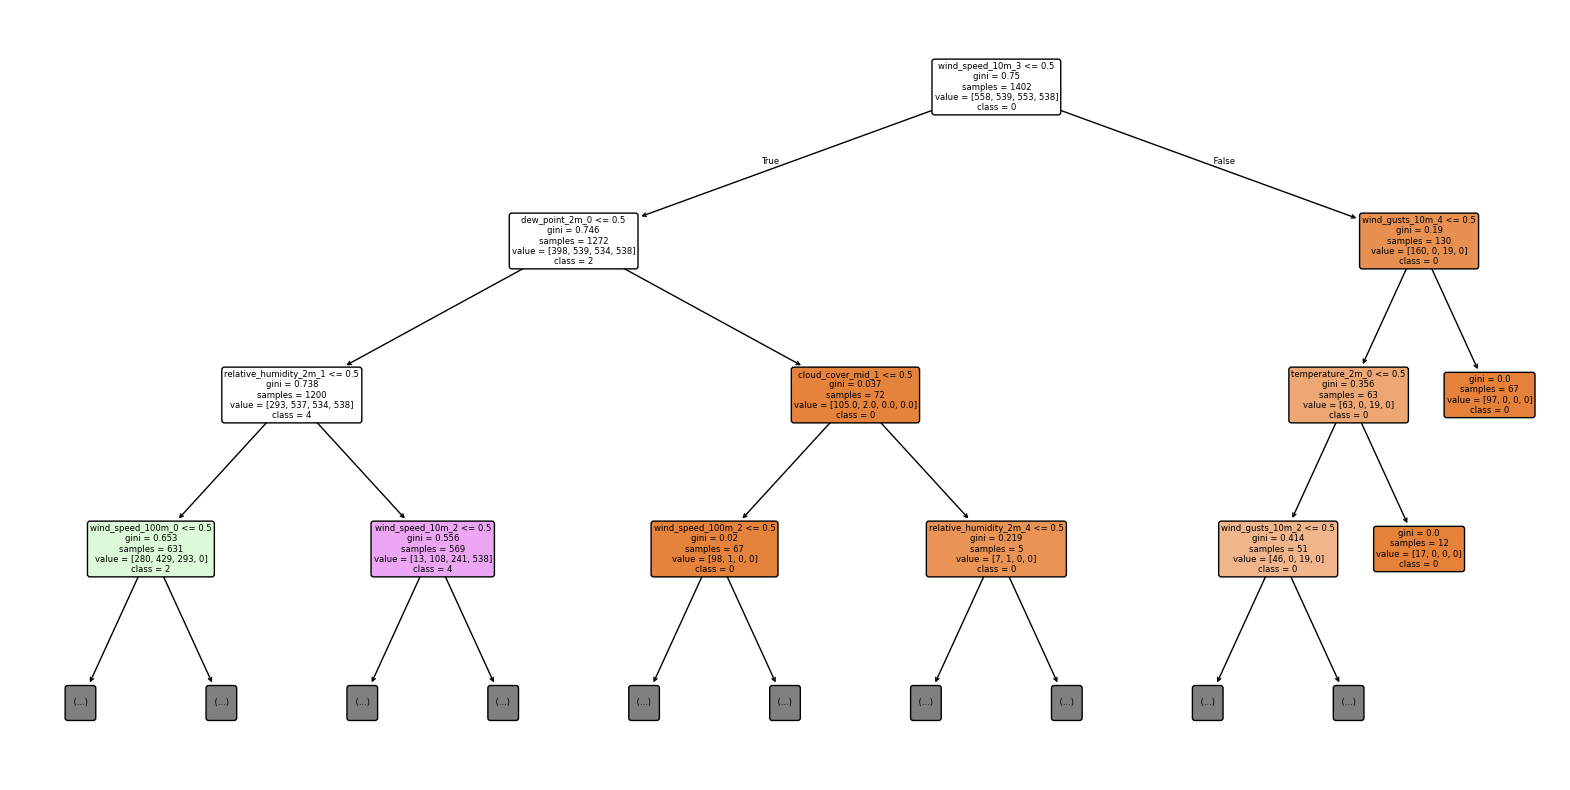

In [29]:
from sklearn.tree import plot_tree

tree = rf_classifier.estimators_[0]

plt.figure(figsize=(20, 10))  # Set figure size for better readability
plot_tree(
    tree, feature_names=X.columns, class_names=[str(c) for c in rf_classifier.classes_], 
    filled=True, rounded=True, max_depth=3)  # You can adjust max_depth
plt.show()